In [25]:
import pandas as pd

df = pd.read_csv('eco2mix-regional-cons-def.csv', sep =';')

dictionnaire={"Code INSEE région":"Code_insee_region",
              "Région":"Region",
              "Consommation (MW)":"Consommation_MW",
             "Thermique (MW)":"Thermique_MW",
             "Nucléaire (MW)" : "Nucleaire_MW",
             "Eolien (MW)" : "Eolien_MW",
             "Solaire (MW)" : "Solaire_MW",
             "Hydraulique (MW)" : "Hydraulique_MW",
             "Pompage (MW)" : "Pompage_MW",
             "Bioénergies (MW)" : "Bioenergies_MW",
             "Ech. physiques (MW)" : "Echphysiques_MW",
             "TCO Thermique (%)" : "TCO_thermique_pourc",
             "TCH Thermique (%)" : "TCH_thermique_pourc",
             "TCO Nucléaire (%)" : "TCO_nucleaire_pourc",
             "TCH Nucléaire (%)" : "TCH_nucleaire_pourc",
             "TCO Eolien (%)" : "TCO_eolien_pourc",
             "TCH Eolien (%)" : "TCH_eolien_pourc",
             "TCO Solaire (%)" : "TCO_solaire_pourc",
             "TCH Solaire (%)" : "TCH_solaire_pourc",
             "TCO Hydraulique (%)" : "TCO_hydraulique_pourc",
             "TCH Hydraulique (%)" : "TCH_hydraulique_pourc",
             "TCO Bioénergies (%)" : "TCO_bioenergies_pourc",
             "TCH Bioénergies (%)" : "TCH_bioenergies_pourc"}

df =df.rename(dictionnaire,axis=1)

# Découpage de la colonne 'Date' en trois colonnes 'Année'/'Mois'/'Jour'
df['Année'] = df['Date'].apply(lambda date: date.split('-')[0])
df['Mois'] = df['Date'].apply(lambda date: date.split('-')[1])
df['Jour'] = df['Date'].apply(lambda date: date.split('-')[2])

# Suppression de la colonne 'Date - Heure'
df.drop('Date - Heure', axis=1)

# Sur quelles années les données sont-elles répertoriées?
print(df['Année'].unique())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,56,58,60,62,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


['2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021']


In [26]:
# Remplacement des valeurs manquantes par des 0 des colonnes Nucleaire_MW (42% de NaNs) et Pompage_MW (44% de NaNs)
df['Nucleaire_MW'] = df['Nucleaire_MW'].fillna(0)
df['Pompage_MW'] = df['Pompage_MW'].fillna(0)

In [12]:
## Remplacement des valeurs manquantes par la moyenne des colonnes Nucleaire_MX (42% de NaNs) et Pompage_MW (44% de NaNs)
df['Nucleaire_MW'] = df['Nucleaire_MW'].fillna(df['Nucleaire_MW'].mean())
df['Pompage_MW'] = df['Pompage_MW'].fillna(df['Pompage_MW'].mean())

In [16]:
# Création des colonnes total_prod et total_conso
df['total_prod'] = df['Thermique_MW']+df['Nucleaire_MW']+df['Eolien_MW']
+df['Solaire_MW']+df['Hydraulique_MW']+df['Bioenergies_MW']
df['total_conso'] = df['Consommation_MW']-df['Pompage_MW']

# Réduction du df avec les seules colonnes qui nous intéressent
df = df[['total_prod', 'total_conso', 'Echphysiques_MW', 'Année']]

In [17]:
# Suppression des 108 lignes avec valeurs manquantes
df.dropna()

,total_prod,total_conso,Echphysiques_MW,Année
12,165.0,3051.0,2779.0,2013
13,5408.0,5464.0,-518.0,2013
14,701.0,9134.0,8289.0,2013
15,12578.0,8177.0,-7551.0,2013
16,342.0,2357.0,1894.0,2013
...,...,...,...,...
1717051,6584.0,5082.0,-2734.0,2021
1717052,6199.0,5723.0,-610.0,2021
1717053,3405.0,4575.0,-1095.0,2021
1717054,335.0,8480.0,8002.0,2021


In [5]:
# Création d'un df qui regroupe les moyennes des valeurs par année
df = df.groupby(by = 'Année',as_index = False).agg({'total_prod':'mean', 
                                                    'total_conso':'mean', 'Echphysiques_MW':'mean'})

In [6]:
# Création de la colonne diff_prod_conso
df['diff_prod_conso'] = df['total_prod'] - df['total_conso']
df

,Année,total_prod,total_conso,Echphysiques_MW,diff_prod_conso
0,2013,4403.380356,4749.607812,-467.334066,-346.227455
1,2014,4352.407097,4474.302507,-645.647236,-121.895410
2,2015,4479.698740,4566.603177,-614.395020,-86.904438
3,2016,4259.789617,4620.756973,-401.101506,-360.967355
4,2017,4335.401108,4625.211225,-389.829286,-289.810117
5,2018,4367.460331,4593.985179,-606.232254,-226.524848
6,2019,4320.035888,4536.809646,-556.305113,-216.773759
7,2020,3900.099656,4287.039195,-433.136745,-386.939540
8,2021,5021.299818,5673.638153,-323.293079,-652.338336


In [7]:
# Création des taux de consommation annuels
df['taux_conso'] = (df['total_conso']/df['total_prod'])*100
df

,Année,total_prod,total_conso,Echphysiques_MW,diff_prod_conso,taux_conso
0,2013,4403.380356,4749.607812,-467.334066,-346.227455,107.862765
1,2014,4352.407097,4474.302507,-645.647236,-121.895410,102.800644
2,2015,4479.698740,4566.603177,-614.395020,-86.904438,101.939962
3,2016,4259.789617,4620.756973,-401.101506,-360.967355,108.473831
4,2017,4335.401108,4625.211225,-389.829286,-289.810117,106.684736
5,2018,4367.460331,4593.985179,-606.232254,-226.524848,105.186649
6,2019,4320.035888,4536.809646,-556.305113,-216.773759,105.017869
7,2020,3900.099656,4287.039195,-433.136745,-386.939540,109.921273
8,2021,5021.299818,5673.638153,-323.293079,-652.338336,112.991424


In [22]:
df['total_prod'] = df['Thermique_MW']+df['Nucleaire_MW']+df['Eolien_MW']
+df['Solaire_MW']+df['Hydraulique_MW']+df['Bioenergies_MW']
df['total_conso'] = df['Consommation_MW']-df['Pompage_MW']

print(df['total_prod'].isna().sum())
print(df['total_conso'].isna().sum())
print(df['Echphysiques_MW'].isna().sum())

df.groupby(by = 'Année',as_index = False).agg({'total_prod':'mean', 'total_conso':'mean', 'Echphysiques_MW':'mean'})

108
12
12


,Année,total_prod,total_conso,Echphysiques_MW
0,2013,4403.380356,4749.607812,-467.334066
1,2014,4352.407097,4474.302507,-645.647236
2,2015,4479.698740,4566.603177,-614.395020
3,2016,4259.789617,4620.756973,-401.101506
4,2017,4335.401108,4625.211225,-389.829286
5,2018,4367.460331,4593.985179,-606.232254
6,2019,4320.035888,4536.809646,-556.305113
7,2020,3900.099656,4287.039195,-433.136745
8,2021,5021.299818,5673.638153,-323.293079


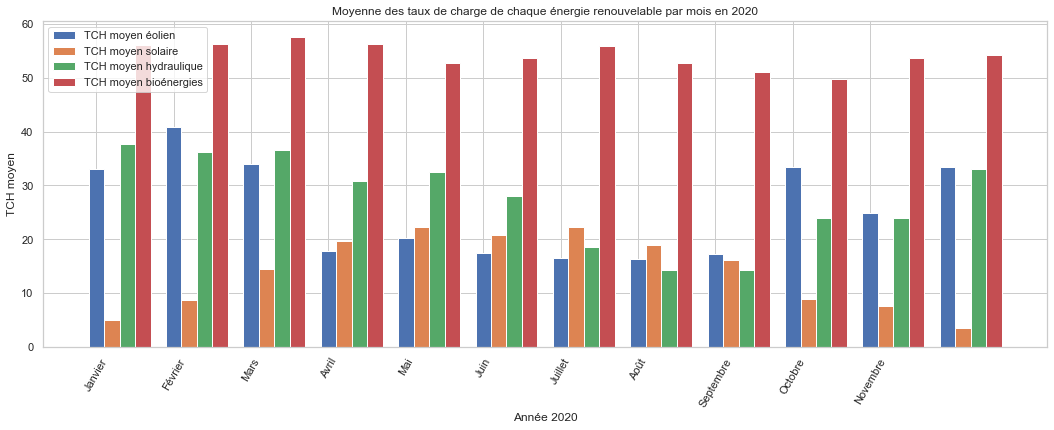

In [23]:
df = df[['TCH_eolien_pourc', 'TCH_solaire_pourc', 'TCH_hydraulique_pourc', 'TCH_bioenergies_pourc', 'Mois', 'Année']]

df.isna().sum()
df = df.dropna()
df = df.drop(labels = df[df['TCH_eolien_pourc'] == '-'].index)

df[['TCH_eolien_pourc', 'TCH_solaire_pourc', 'TCH_hydraulique_pourc', 
    'TCH_bioenergies_pourc']] = df[['TCH_eolien_pourc', 'TCH_solaire_pourc', 
                                    'TCH_hydraulique_pourc', 'TCH_bioenergies_pourc']].astype('float64')

df = df.groupby(by = 'Mois', as_index = False).agg({'TCH_eolien_pourc':'mean', 'TCH_solaire_pourc':'mean',
                                              'TCH_hydraulique_pourc':'mean', 'TCH_bioenergies_pourc':'mean'})

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize = (18,6))

barWidth = 0.2

x1 = range(len(df))
x2 = [r + barWidth for r in x1 ]
x3 = [r + barWidth for r in x2 ]
x4 = [r + barWidth for r in x3 ]

plt.bar(x1, df['TCH_eolien_pourc'], width = barWidth, label = 'TCH moyen éolien')
plt.bar(x2, df['TCH_solaire_pourc'], width = barWidth, label = 'TCH moyen solaire')
plt.bar(x3, df['TCH_hydraulique_pourc'], width = barWidth, label = 'TCH moyen hydraulique')
plt.bar(x4, df['TCH_bioenergies_pourc'], width = barWidth, label = 'TCH moyen bioénergies')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10], ['Janvier','Février','Mars','Avril','Mai','Juin',
                                         'Juillet','Août','Septembre','Octobre','Novembre'], rotation = '60')
plt.legend()
plt.xlabel('Année 2020')
plt.ylabel('TCH moyen')
plt.title('Moyenne des taux de charge de chaque énergie renouvelable par mois en 2020');

In [27]:
renew = df[['Eolien_MW', 'Solaire_MW', 'Hydraulique_MW', 'Bioenergies_MW', 'Mois', 'Année']]
renew.isna().sum()
renew = renew.dropna()
renew.isna().sum()

renew19 = renew.loc[renew['Année'] == '2019']
renew18 = renew.loc[renew['Année'] == '2018']
renew17 = renew.loc[renew['Année'] == '2017']

renew19 = renew19.groupby('Mois', as_index = False).agg({'Eolien_MW':'mean','Solaire_MW':'mean',
                                                        'Hydraulique_MW':'mean','Bioenergies_MW':'mean'})

renew18 = renew18.groupby('Mois', as_index = False).agg({'Eolien_MW':'mean','Solaire_MW':'mean',
                                                        'Hydraulique_MW':'mean','Bioenergies_MW':'mean'})

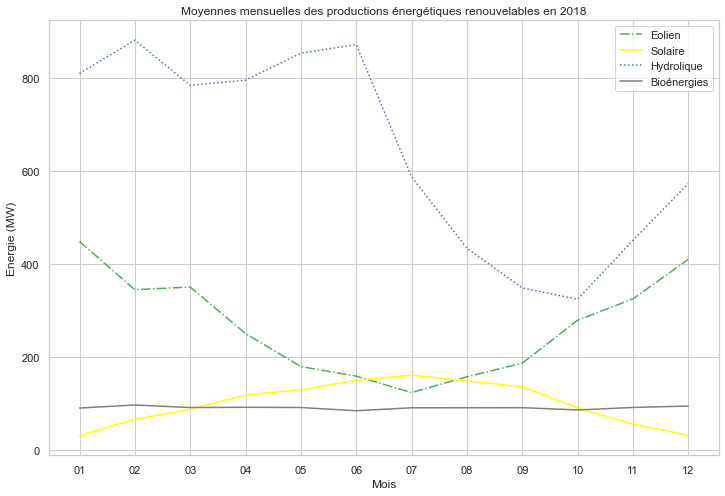

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize = (12,8))
plt.xlabel('Mois')
plt.ylabel('Energie (MW)')
plt.title("Moyennes mensuelles des productions énergétiques renouvelables en 2018")
plt.plot(renew18['Mois'], renew18['Eolien_MW'], 'g-.', label = 'Eolien')
plt.plot(renew18['Mois'], renew18['Solaire_MW'], label = 'Solaire', color = 'yellow')
plt.plot(renew18['Mois'], renew18['Hydraulique_MW'], 'b:', label = 'Hydrolique')
plt.plot(renew18['Mois'], renew18['Bioenergies_MW'], label = 'Bioénergies', color = 'grey')
plt.legend();

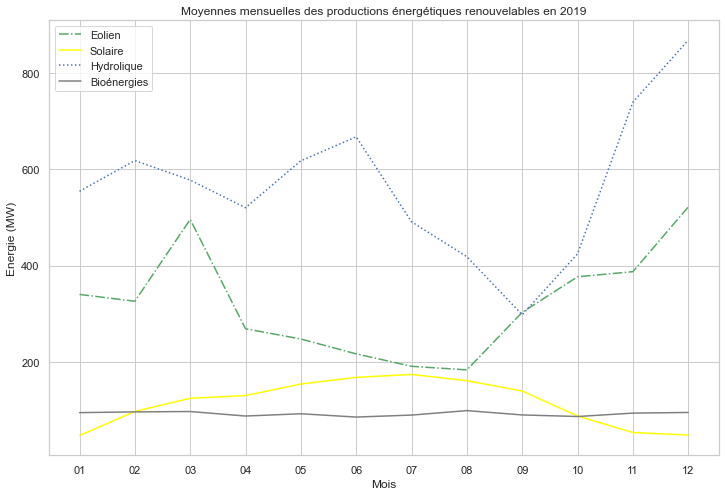

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize = (12,8))
plt.xlabel('Mois')
plt.ylabel('Energie (MW)')
plt.title("Moyennes mensuelles des productions énergétiques renouvelables en 2019")
plt.plot(renew19['Mois'], renew19['Eolien_MW'], 'g-.', label = 'Eolien')
plt.plot(renew19['Mois'], renew19['Solaire_MW'], label = 'Solaire', color = 'yellow')
plt.plot(renew19['Mois'], renew19['Hydraulique_MW'], 'b:', label = 'Hydrolique')
plt.plot(renew19['Mois'], renew19['Bioenergies_MW'], label = 'Bioénergies', color = 'grey')
plt.legend();

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665216 entries, 0 to 1665215
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count    Dtype  
---  ------                                                    --------------    -----  
 0   Code_insee_region                                         1665216 non-null  int64  
 1   Region                                                    1665216 non-null  object 
 2   Nature                                                    1665216 non-null  object 
 3   Date                                                      1665216 non-null  object 
 4   Heure                                                     1665216 non-null  object 
 5   Date - Heure                                              1665216 non-null  object 
 6   Consommation_MW                                           1665204 non-null  float64
 7   Thermique_MW                                              1665204 non-null  float

In [45]:
dictionnaire={"Code INSEE région":"Code_insee_region",
              "Région":"Region",
              "Consommation (MW)":"Consommation_MW",
             "Thermique (MW)":"Thermique_MW",
             "Nucléaire (MW)" : "Nucleaire_MW",
             "Eolien (MW)" : "Eolien_MW",
             "Solaire (MW)" : "Solaire_MW",
             "Hydraulique (MW)" : "Hydraulique_MW",
             "Pompage (MW)" : "Pompage_MW",
             "Bioénergies (MW)" : "Bioenergies_MW",
             "Ech. physiques (MW)" : "Echphysiques_MW",
             "TCO Thermique (%)" : "TCO_thermique_pourc",
             "TCH Thermique (%)" : "TCH_thermique_pourc",
             "TCO Nucléaire (%)" : "TCO_nucleaire_pourc",
             "TCH Nucléaire (%)" : "TCH_nucleaire_pourc",
             "TCO Eolien (%)" : "TCO_eolien_pourc",
             "TCH Eolien (%)" : "TCH_eolien_pourc",
             "TCO Solaire (%)" : "TCO_solaire_pourc",
             "TCH Solaire (%)" : "TCH_solaire_pourc",
             "TCO Hydraulique (%)" : "TCO_hydraulique_pourc",
             "TCH Hydraulique (%)" : "TCH_hydraulique_pourc",
             "TCO Bioénergies (%)" : "TCO_bioenergies_pourc",
             "TCH Bioénergies (%)" : "TCH_bioenergies_pourc"}

df =df.rename(dictionnaire,axis=1)
print(df.columns)

Index(['Mois', 'TCH_eolien_pourc', 'TCH_solaire_pourc',
       'TCH_hydraulique_pourc', 'TCH_bioenergies_pourc'],
      dtype='object')


In [48]:
import pandas as pd

df = pd.read_csv('eco2mix-regional-cons-def.csv', sep =';')

dictionnaire={"Code INSEE région":"Code_insee_region",
              "Région":"Region",
              "Consommation (MW)":"Consommation_MW",
             "Thermique (MW)":"Thermique_MW",
             "Nucléaire (MW)" : "Nucleaire_MW",
             "Eolien (MW)" : "Eolien_MW",
             "Solaire (MW)" : "Solaire_MW",
             "Hydraulique (MW)" : "Hydraulique_MW",
             "Pompage (MW)" : "Pompage_MW",
             "Bioénergies (MW)" : "Bioenergies_MW",
             "Ech. physiques (MW)" : "Echphysiques_MW",
             "TCO Thermique (%)" : "TCO_thermique_pourc",
             "TCH Thermique (%)" : "TCH_thermique_pourc",
             "TCO Nucléaire (%)" : "TCO_nucleaire_pourc",
             "TCH Nucléaire (%)" : "TCH_nucleaire_pourc",
             "TCO Eolien (%)" : "TCO_eolien_pourc",
             "TCH Eolien (%)" : "TCH_eolien_pourc",
             "TCO Solaire (%)" : "TCO_solaire_pourc",
             "TCH Solaire (%)" : "TCH_solaire_pourc",
             "TCO Hydraulique (%)" : "TCO_hydraulique_pourc",
             "TCH Hydraulique (%)" : "TCH_hydraulique_pourc",
             "TCO Bioénergies (%)" : "TCO_bioenergies_pourc",
             "TCH Bioénergies (%)" : "TCH_bioenergies_pourc"}

df =df.rename(dictionnaire,axis=1)

# Découpage de la colonne 'Date' en trois colonnes 'Année'/'Mois'/'Jour'
df['Année'] = df['Date'].apply(lambda date: date.split('-')[0])
df['Mois'] = df['Date'].apply(lambda date: date.split('-')[1])
df['Jour'] = df['Date'].apply(lambda date: date.split('-')[2])

# Suppression de la colonne 'Date - Heure'
df.drop('Date - Heure', axis=1)

# Sur quelles années les données sont-elles répertoriées?
print(df['Année'].unique())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,56,58,60,62,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


['2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020']


0
0
0


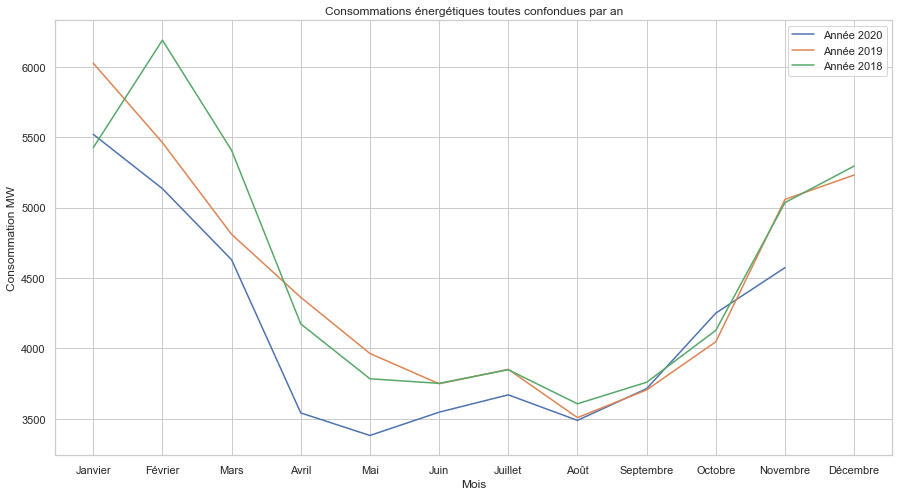

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df20 = df.loc[df['Année'] == '2020']
df19 = df.loc[df['Année'] == '2019']
df18 = df.loc[df['Année'] == '2018']

print(df20['Consommation_MW'].isna().sum())
print(df19['Consommation_MW'].isna().sum())
print(df18['Consommation_MW'].isna().sum())

df20 = df20.groupby('Mois', as_index = False).agg({'Consommation_MW':'mean'})
df19 = df19.groupby('Mois', as_index = False).agg({'Consommation_MW':'mean'})
df18 = df18.groupby('Mois', as_index = False).agg({'Consommation_MW':'mean'})

sns.set(style="whitegrid")
plt.figure(figsize = (15,8))
plt.plot(df20['Mois'], df20['Consommation_MW'], label = 'Année 2020')
plt.plot(df19['Mois'], df19['Consommation_MW'], label = 'Année 2019')
plt.plot(df18['Mois'], df18['Consommation_MW'], label = 'Année 2018')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Janvier','Février','Mars','Avril','Mai','Juin',
                                         'Juillet','Août','Septembre','Octobre','Novembre','Décembre'])
plt.legend()
plt.xlabel('Mois')
plt.ylabel('Consommation MW')
plt.title('Consommations énergétiques toutes confondues par an');

In [282]:
print(df20_3.info())
print(df19_3.info())
print(df18_3.info())

print(df20_3.isna().sum())
print(df19_3.isna().sum())
print(df18_3.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112560 entries, 1472257 to 1665215
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Nucléaire (MW)  112560 non-null  float64
 1   Année           112560 non-null  object 
 2   Mois            112560 non-null  object 
 3   Jour            112560 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122640 entries, 1262016 to 1472255
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Nucléaire (MW)  122640 non-null  float64
 1   Année           122640 non-null  object 
 2   Mois            122640 non-null  object 
 3   Jour            122640 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122640 entries, 1051776 to 1262015
Data columns (t

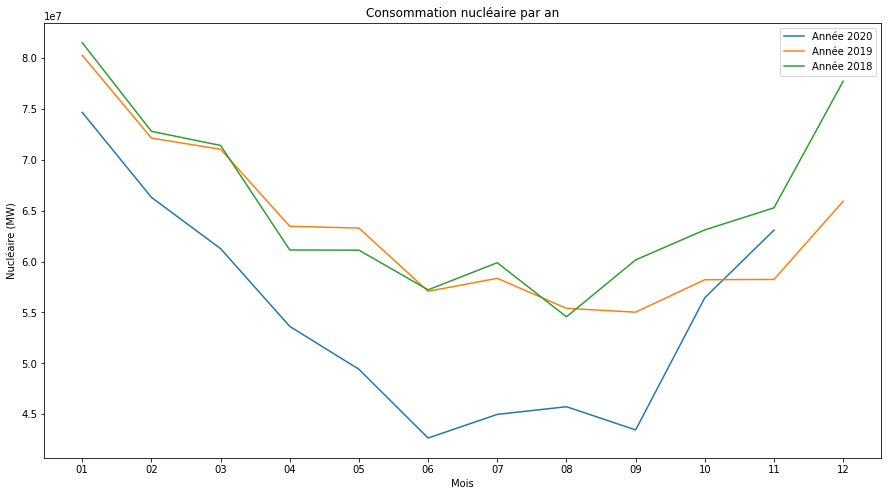

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df20 = df.loc[df['Année'] == '2020']
df19 = df.loc[df['Année'] == '2019']
df18 = df.loc[df['Année'] == '2018']

df20_1 = df20.iloc[:,-3:]
df20_2 = df20['Nucléaire (MW)']
df20_3 = pd.concat([df20_2, df20_1], axis=1)
df20_3 = df20_3.dropna()
df20 = df20_3.groupby('Mois', as_index = False).agg({'Nucléaire (MW)':'sum'})

df19_1 = df19.iloc[:,-3:]
df19_2 = df19['Nucléaire (MW)']
df19_3 = pd.concat([df19_2, df19_1], axis=1)
df19_3 = df19_3.dropna()
df19 = df19_3.groupby('Mois', as_index = False).agg({'Nucléaire (MW)':'sum'})

df18_1 = df18.iloc[:,-3:]
df18_2 = df18['Nucléaire (MW)']
df18_3 = pd.concat([df18_2, df18_1], axis=1)
df18_3 = df18_3.dropna()
df18 = df18_3.groupby('Mois', as_index = False).agg({'Nucléaire (MW)':'sum'})

plt.figure(figsize = (15,8))
plt.plot(df20['Mois'], df20['Nucléaire (MW)'], label = 'Année 2020')
plt.plot(df19['Mois'], df19['Nucléaire (MW)'], label = 'Année 2019')
plt.plot(df18['Mois'], df18['Nucléaire (MW)'], label = 'Année 2018')
plt.legend()
plt.xlabel('Mois')
plt.ylabel('Nucléaire (MW)')
plt.title('Consommation nucléaire par an');

In [1]:
import pandas as pd

df = pd.read_csv('eco2mix-regional-tr.csv', sep =';')

# Découpage de la colonne 'Date' en trois colonnes 'Année'/'Mois'/'Jour'
df['Année'] = df['Date'].apply(lambda date: date.split('-')[0])
df['Mois'] = df['Date'].apply(lambda date: date.split('-')[1])
df['Jour'] = df['Date'].apply(lambda date: date.split('-')[2])

# Suppression de la colonne 'Date - Heure'
df.drop('Date - Heure', axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,17,18,19,22,23,24,26,27,29,30,31,34,35,36,38,41,42,44,48,49,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Code INSEE région,Région,Nature,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Année,Mois,Jour
0,44,Grand Est,Données temps réel,2021-02-04,18:15,6333.0,1536.0,8659.0,646.0,4.0,...,16.74,0.06,0.67,20.86,57.21,1.66,43.57,2021,02,04
1,44,Grand Est,Données temps réel,2021-02-04,19:45,6139.0,1551.0,8785.0,654.0,0.0,...,16.94,0.00,0.00,20.72,55.09,1.71,43.57,2021,02,04
2,44,Grand Est,Données temps réel,2021-02-04,22:15,5185.0,1007.0,8814.0,672.0,0.0,...,17.41,0.00,0.00,18.84,42.31,2.03,43.57,2021,02,04
3,44,Grand Est,Données temps réel,2021-02-05,00:45,5135.0,587.0,8712.0,472.0,0.0,...,12.23,0.00,0.00,19.10,42.49,2.04,43.57,2021,02,05
4,44,Grand Est,Données temps réel,2021-02-05,01:30,5078.0,585.0,8716.0,419.0,0.0,...,10.85,0.00,0.00,19.44,42.75,2.07,43.57,2021,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76027,93,Provence-Alpes-Côte d'Azur,Données temps réel,2021-03-07,17:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,03,07
76028,93,Provence-Alpes-Côte d'Azur,Données temps réel,2021-03-07,17:45,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,03,07
76029,93,Provence-Alpes-Côte d'Azur,Données temps réel,2021-03-07,20:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,03,07
76030,93,Provence-Alpes-Côte d'Azur,Données temps réel,2021-03-07,22:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,03,07
